# Single Image Super Resolution using SWIN2SR model

**Setting up environment**

In [1]:
! pip -q install timm

In [2]:
import os
import cv2
import numpy as np
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from skimage.metrics import structural_similarity as ssim
os.chdir("./swin2sr")

**Loading images**

In [3]:
def load_img (filename, debug=False, norm=True, resize=None):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if norm:   
        img = img / 255.
        img = img.astype(np.float32)
    if debug:
        print (img.shape, img.dtype, img.min(), img.max())
        
    if resize:
        img = cv2.resize(img, (resize[0], resize[1]))
        
    return img

def plot_all (images, axis='off', figsize=(16, 8)):
    
    fig = plt.figure(figsize=figsize, dpi=80)
    nplots = len(images)
    for i in range(nplots):
        plt.subplot(1,nplots,i+1)
        plt.axis(axis)
        plt.imshow(images[i])
    plt.show()

**Create an input folder and give input files for testing**

**Applying model and to files from input directory and saving reconstructed images**

In [4]:
! python main_test_swin2sr.py --task compressed_sr --scale 4 --training_patch_size 48 --model_path model_zoo/swin2sr/Swin2SR_CompressedSR_X4_48.pth --folder_lq ./inputs/ --save_img_only

loading model from model_zoo/swin2sr/Swin2SR_CompressedSR_X4_48.pth
Testing 0 LR (1)              
Testing 1 LR (10)             
Testing 2 LR (11)             
Testing 3 LR (12)             
Testing 4 LR (13)             
Testing 5 LR (14)             
Testing 6 LR (15)             
Testing 7 LR (2)              
Testing 8 LR (3)              
Testing 9 LR (4)              
Testing 10 LR (5)              
Testing 11 LR (6)              
Testing 12 LR (7)              
Testing 13 LR (8)              
Testing 14 LR (9)              


C:\Users\lifea\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


**Processing and visualizing image upscaling results**

Processing ./inputs\LR (1).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


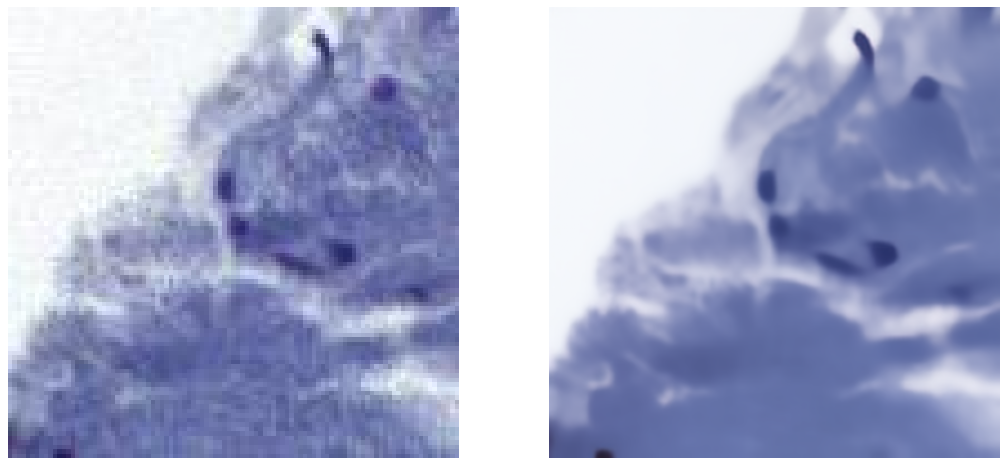

Processing ./inputs\LR (10).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


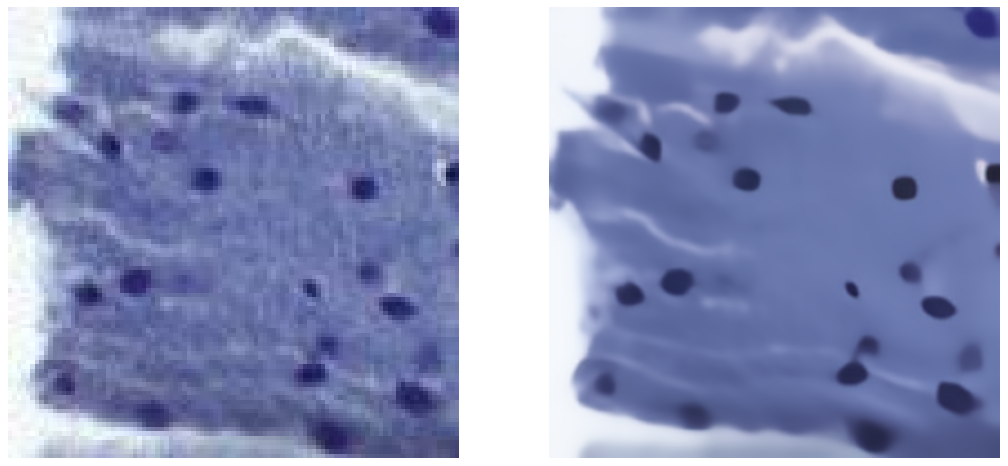

Processing ./inputs\LR (11).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


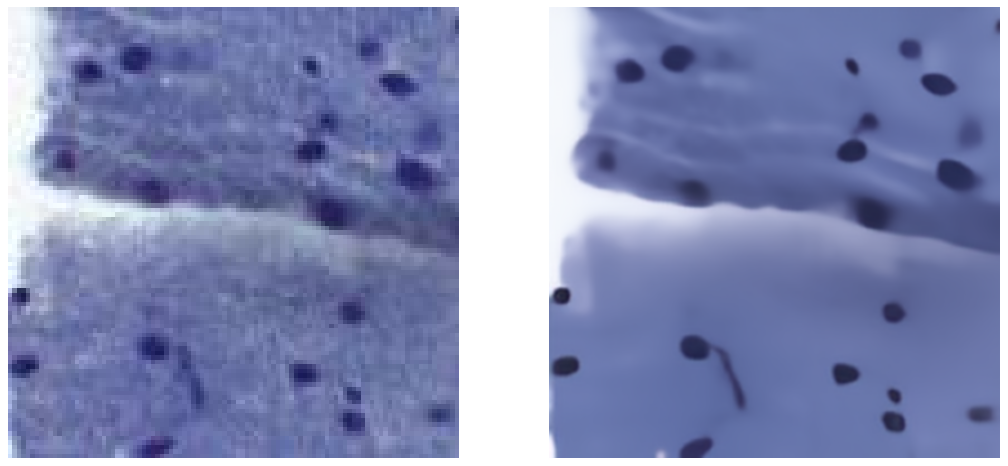

Processing ./inputs\LR (12).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


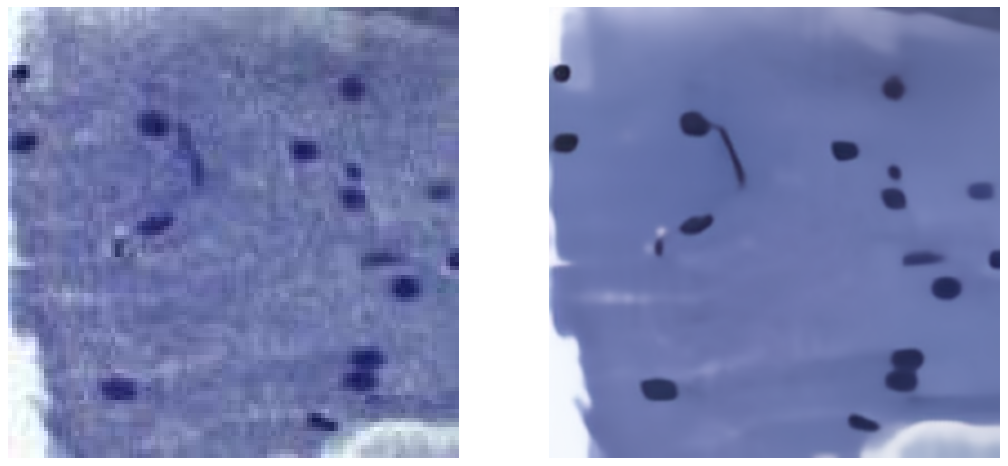

Processing ./inputs\LR (13).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


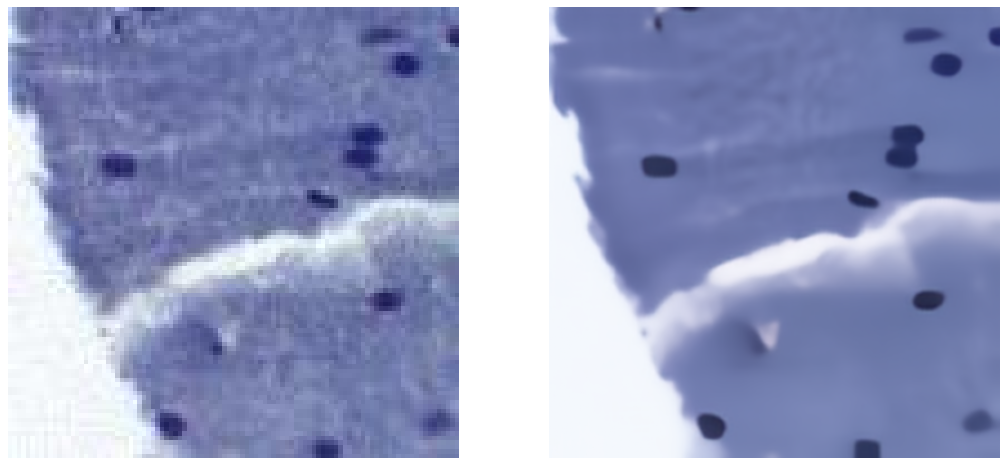

Processing ./inputs\LR (14).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


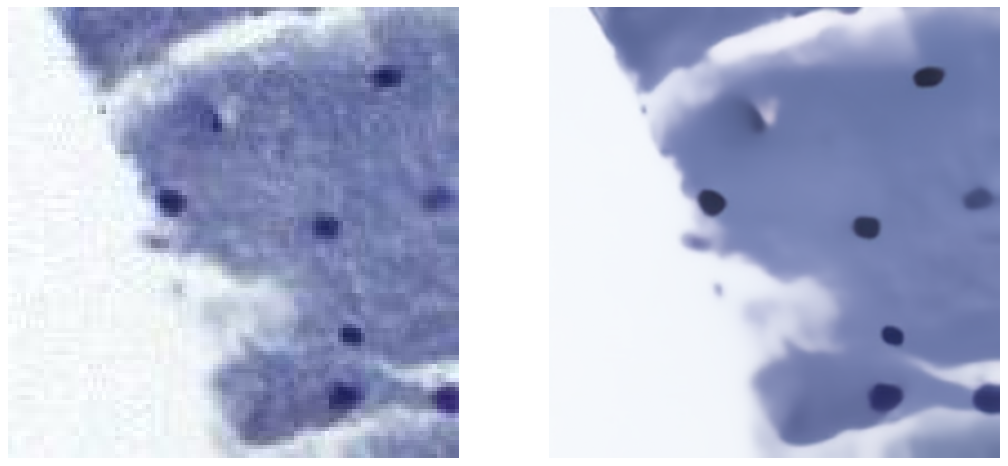

Processing ./inputs\LR (15).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


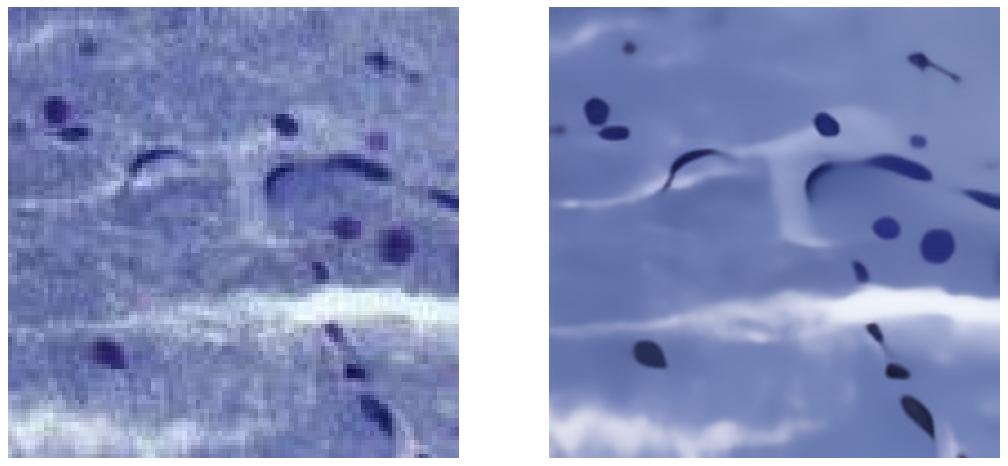

Processing ./inputs\LR (2).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


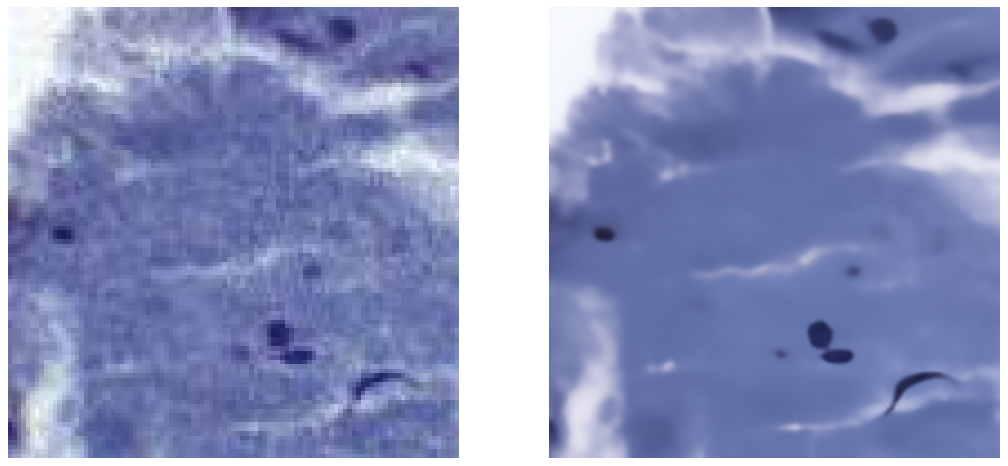

Processing ./inputs\LR (3).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


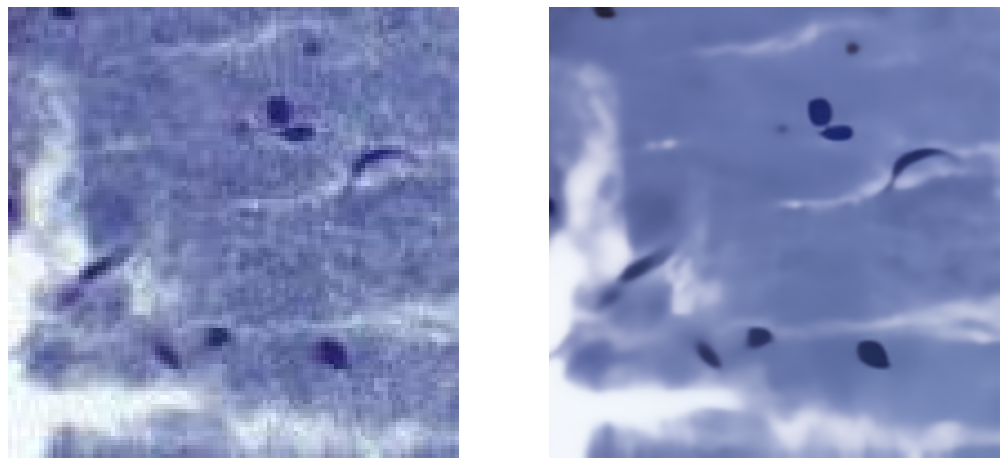

Processing ./inputs\LR (4).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


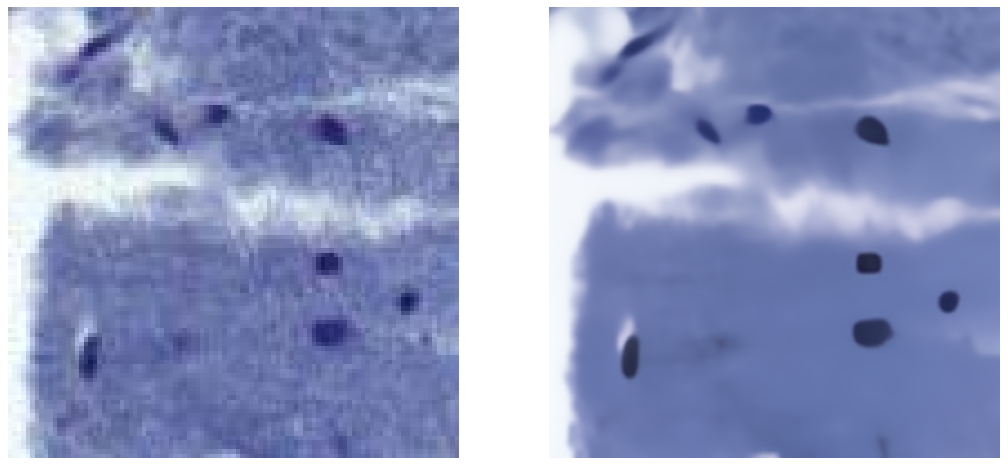

Processing ./inputs\LR (5).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


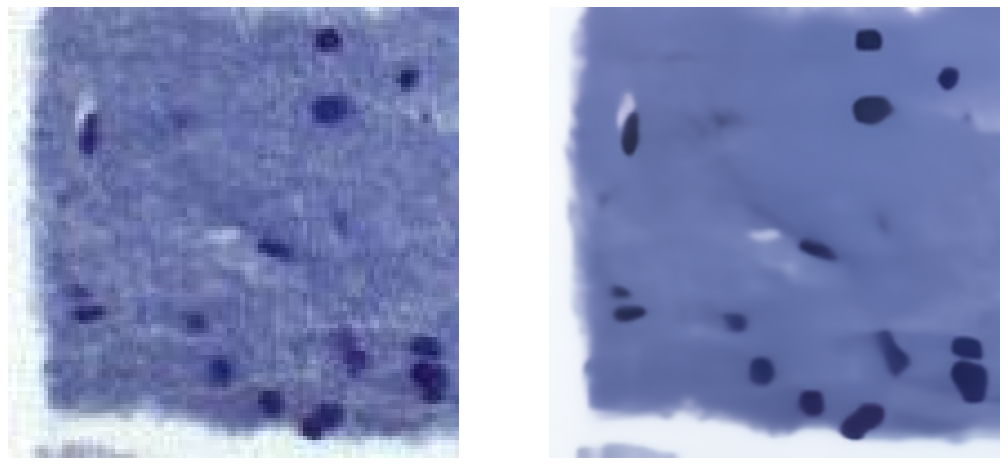

Processing ./inputs\LR (6).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


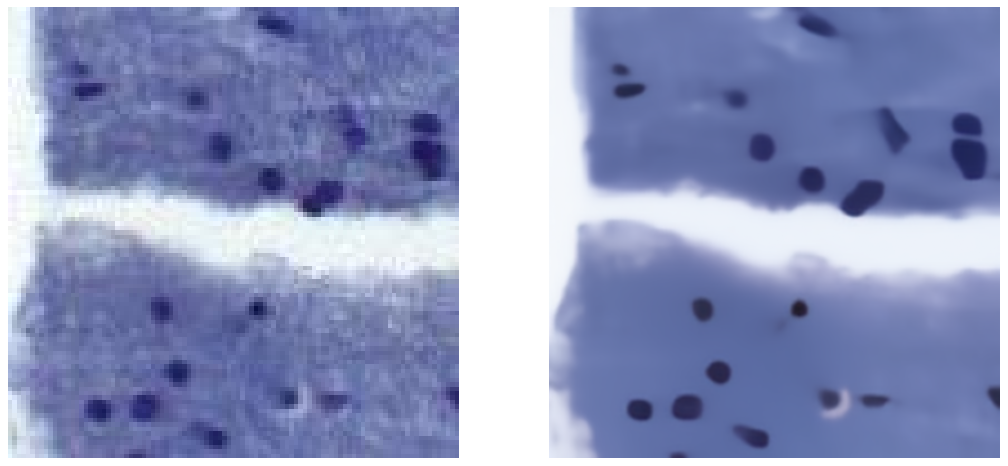

Processing ./inputs\LR (7).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


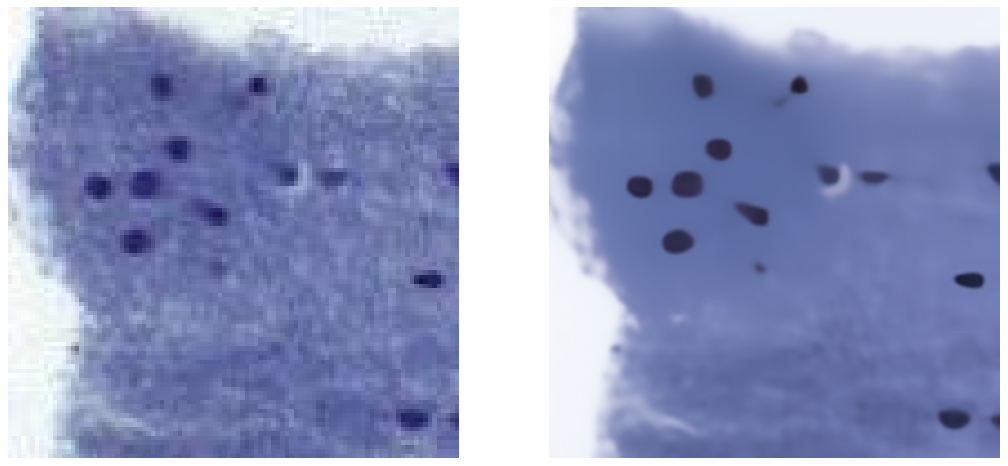

Processing ./inputs\LR (8).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


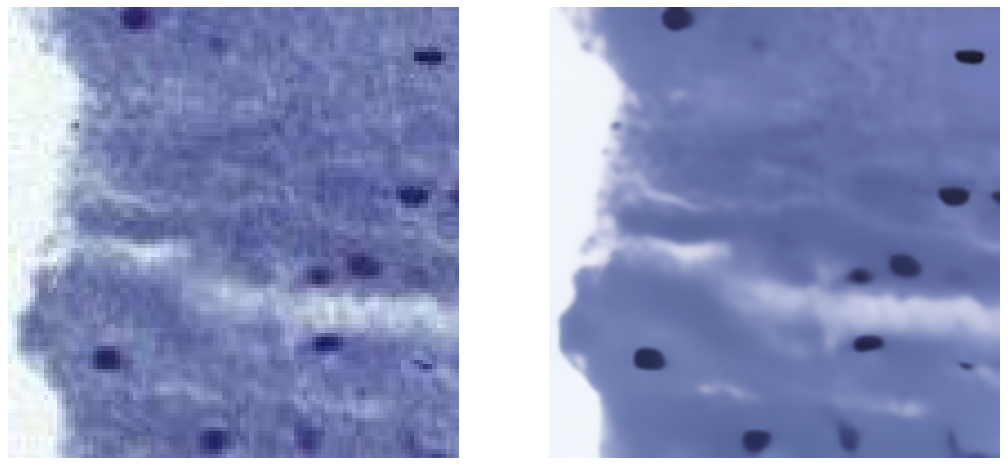

Processing ./inputs\LR (9).jpeg. Upscaling resolution from (101, 101, 3) to (404, 404, 3)


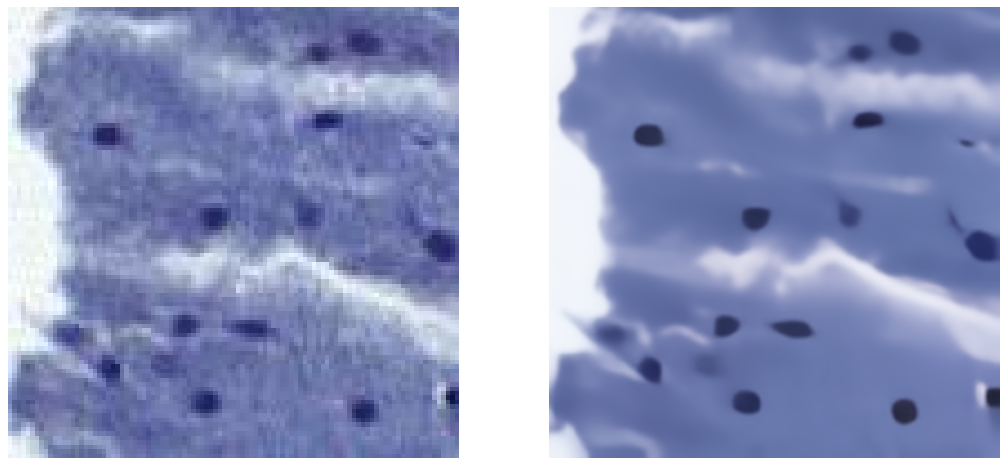

In [5]:
inputs  = sorted(glob('./inputs/*'))
outputs = sorted(glob('./results/swin2sr_compressed_sr_x4/*')) # the path to the folder above

for input_img_path, output_img_path in zip(inputs, outputs):

    img_input  = load_img(input_img_path)
    img_output = load_img(output_img_path)
    
    print (f'Processing {input_img_path}. Upscaling resolution from {img_input.shape} to {img_output.shape}')
    plot_all([img_input, img_output])

**Evaluating the model generated results with PSNR metrics**

In [6]:
def calculate_psnr_of_images(input_dir, result_dir):
    psnr_values = []
    input_files = sorted(os.listdir(input_dir))
    result_files = sorted(os.listdir(result_dir))
    
    if len(input_files) != len(result_files):
        print("Number of input files and result files don't match.")
        return psnr_values

    num_images = len(input_files)

    for i in range(num_images):
        img1_path = os.path.join(input_dir, input_files[i])
        img2_path = os.path.join(result_dir, result_files[i])
        
        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB')
        
        img2_resized = img2.resize(img1.size)
        mse = np.mean((np.array(img1, dtype=int) - np.array(img2_resized, dtype=int)) ** 2)
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
        psnr_values.append(psnr)
        print(f"PSNR for image {i+1}: {psnr:.2f}")
    
    avg_psnr = np.mean(psnr_values)
    print(f"Average PSNR: {avg_psnr:.2f}")
    
    return


In [7]:
inputs = "C:/Users/lifea/Downloads/SISR/model1_SWIN2SR/swin2sr/inputs"
results = "C:/Users/lifea/Downloads/SISR/model1_SWIN2SR/swin2sr/results/swin2sr_compressed_sr_x4"
calculate_psnr_of_images(inputs,results)

PSNR for image 1: 30.94
PSNR for image 2: 29.91
PSNR for image 3: 29.79
PSNR for image 4: 29.73
PSNR for image 5: 30.37
PSNR for image 6: 30.99
PSNR for image 7: 28.66
PSNR for image 8: 30.04
PSNR for image 9: 29.85
PSNR for image 10: 29.80
PSNR for image 11: 29.75
PSNR for image 12: 29.40
PSNR for image 13: 30.02
PSNR for image 14: 30.56
PSNR for image 15: 29.70
Average PSNR: 29.97


**Evaluating the model generated results with SSIM metrics**

In [8]:
def calculate_ssim_of_images(original_dir, high_res_dir):
    ssim_values = []
    original_files = sorted(os.listdir(original_dir))
    high_res_files = sorted(os.listdir(high_res_dir))

    if len(original_files) != len(high_res_files):
        print("Number of original files and high-resolution files don't match.")
        return ssim_values

    num_images = len(original_files)

    for i in range(num_images):
        original_path = os.path.join(original_dir, original_files[i])
        high_res_path = os.path.join(high_res_dir, high_res_files[i])
        
        original_image = Image.open(original_path).convert("RGB")
        original_image = original_image.resize((404, 404))
        high_res_image = Image.open(high_res_path).convert("RGB")
        
        ssim_value, _ = ssim(np.array(original_image), np.array(high_res_image), full=True, multichannel=True)
        ssim_values.append(ssim_value)
        print(f"SSIM for image {i+1}: {ssim_value:.2f}")

    average_ssim = np.mean(ssim_values)
    print(f"Average SSIM: {average_ssim:.2f}")
    
    return

In [9]:
calculate_ssim_of_images(inputs,results)

C:\Users\lifea\AppData\Local\Temp\ipykernel_17424\415303177.py:20: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value, _ = ssim(np.array(original_image), np.array(high_res_image), full=True, multichannel=True)


SSIM for image 1: 0.87
SSIM for image 2: 0.84
SSIM for image 3: 0.83
SSIM for image 4: 0.82
SSIM for image 5: 0.85
SSIM for image 6: 0.86
SSIM for image 7: 0.78
SSIM for image 8: 0.84
SSIM for image 9: 0.83
SSIM for image 10: 0.83
SSIM for image 11: 0.82
SSIM for image 12: 0.82
SSIM for image 13: 0.84
SSIM for image 14: 0.85
SSIM for image 15: 0.83
Average SSIM: 0.83


**Evaluating the model generated results with LPIPS metrics**

In [10]:
pip install lpips

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
import lpips

def calculate_lpips_score(folder1, folder2):
    lpips_scores = []
    lpips_model = lpips.LPIPS(net='alex')
    images1 = sorted(os.listdir(folder1))
    images2 = sorted(os.listdir(folder2))

    if len(images1) != len(images2):
        print("The number of images in both folders is not the same.")
        return lpips_scores

    num_images = len(images1)
    total_lpips_score = 0.0

    for i in range(num_images):
        image_path1 = os.path.join(folder1, images1[i])
        image_path2 = os.path.join(folder2, images2[i])

        image1 = Image.open(image_path1).convert('RGB')
        image2 = Image.open(image_path2).convert('RGB')

        min_width = min(image1.width, image2.width)
        min_height = min(image1.height, image2.height)
        image1 = image1.resize((min_width, min_height), Image.BICUBIC)
        image2 = image2.resize((min_width, min_height), Image.BICUBIC)

        image1 = torch.Tensor(np.array(image1).transpose((2, 0, 1))).float() / 255
        image2 = torch.Tensor(np.array(image2).transpose((2, 0, 1))).float() / 255

        lpips_score = lpips_model(image1.unsqueeze(0), image2.unsqueeze(0))
        lpips_scores.append(lpips_score.item())
        print(f"LPIPS score for {images1[i]} and {images2[i]}: {lpips_score.item()}")

    avg_lpips_score = sum(lpips_scores) / num_images
    print("Average LPIPS score:", avg_lpips_score)

    return lpips_scores


In [12]:
lpips_scores = calculate_lpips_score(inputs,results)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\lifea\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\lifea\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\lifea\anaconda3\lib\site-packages\lpips\weights\v0.1\alex.pth
LPIPS score for LR (1).jpeg and LR (1)_Swin2SR.png: 0.16349409520626068
LPIPS score for LR (10).jpeg and LR (10)_Swin2SR.png: 0.17773760855197906
LPIPS score for LR (11).jpeg and LR (11)_Swin2SR.png: 0.24368609488010406
LPIPS score for LR (12).jpeg and LR (12)_Swin2SR.png: 0.23110714554786682
LPIPS score for LR (13).jpeg and LR (13)_Swin2SR.png: 0.1948871910572052


C:\Users\lifea\AppData\Local\Temp\ipykernel_17424\1593459150.py:26: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image1 = image1.resize((min_width, min_height), Image.BICUBIC)
C:\Users\lifea\AppData\Local\Temp\ipykernel_17424\1593459150.py:27: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image2 = image2.resize((min_width, min_height), Image.BICUBIC)


LPIPS score for LR (14).jpeg and LR (14)_Swin2SR.png: 0.1616251915693283
LPIPS score for LR (15).jpeg and LR (15)_Swin2SR.png: 0.20656009018421173
LPIPS score for LR (2).jpeg and LR (2)_Swin2SR.png: 0.24814556539058685
LPIPS score for LR (3).jpeg and LR (3)_Swin2SR.png: 0.21801535785198212
LPIPS score for LR (4).jpeg and LR (4)_Swin2SR.png: 0.2255645990371704
LPIPS score for LR (5).jpeg and LR (5)_Swin2SR.png: 0.20270805060863495
LPIPS score for LR (6).jpeg and LR (6)_Swin2SR.png: 0.1921881139278412
LPIPS score for LR (7).jpeg and LR (7)_Swin2SR.png: 0.2519757151603699
LPIPS score for LR (8).jpeg and LR (8)_Swin2SR.png: 0.1870153844356537
LPIPS score for LR (9).jpeg and LR (9)_Swin2SR.png: 0.183775395154953
Average LPIPS score: 0.20589903990427652


**Image Evaluation and Comparison with metrics and Visualization**

In [13]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.transforms.functional as TF
import lpips

def calculate_psnr(img1, img2):
    mse = np.mean((np.array(img1, dtype=int) - np.array(img2, dtype=int)) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_ssim(img1, img2):
    ssim_value, _ = ssim(np.array(img1), np.array(img2), full=True, multichannel=True)
    return ssim_value

def calculate_lpips(img1, img2):
    lpips_model = lpips.LPIPS(net='vgg')
    lpips_value = lpips_model(TF.to_tensor(img1).unsqueeze(0), TF.to_tensor(img2).unsqueeze(0)).item()
    return lpips_value

def load_plot_save_images(lr_folder, reconstructed_folder, hr_folder, output_folder):
    lr_files = sorted(os.listdir(lr_folder))
    reconstructed_files = sorted(os.listdir(reconstructed_folder))
    hr_files = sorted(os.listdir(hr_folder))

    if len(lr_files) != len(reconstructed_files) or len(lr_files) != len(hr_files):
        print("Number of images in input folders don't match.")
        return

    os.makedirs(output_folder, exist_ok=True)

    for i in range(len(lr_files)):
        lr_path = os.path.join(lr_folder, lr_files[i])
        reconstructed_path = os.path.join(reconstructed_folder, reconstructed_files[i])
        hr_path = os.path.join(hr_folder, hr_files[i])

        lr_image = Image.open(lr_path).convert('RGB')
        reconstructed_image = Image.open(reconstructed_path).convert('RGB')
        hr_image = Image.open(hr_path).convert('RGB')

        # Resize images to match the size of the reconstructed image
        size = reconstructed_image.size
        lr_image = lr_image.resize(size)
        hr_image = hr_image.resize(size)

        # Calculate metrics
        psnr = calculate_psnr(reconstructed_image, hr_image)
        ssim_value = calculate_ssim(reconstructed_image, hr_image)
        lpips_value = calculate_lpips(reconstructed_image, hr_image)

        # Plot images
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(lr_image)
        axes[0].axis('off')
        axes[0].set_title('LR Image')
        axes[1].imshow(reconstructed_image)
        axes[1].axis('off')
        axes[1].set_title('Reconstructed Image')
        axes[2].imshow(hr_image)
        axes[2].axis('off')
        axes[2].set_title('HR Image')

        # Add metric values below reconstructed image
        metric_values = f'PSNR: {psnr:.2f}, SSIM: {ssim_value:.2f}, LPIPS: {lpips_value:.2f}'
        plt.text(0.5, -0.2, metric_values, horizontalalignment='center', verticalalignment='center',
                 transform=axes[1].transAxes, fontsize=10)

        # Save the plotted image
        output_path = os.path.join(output_folder, f'image_{i+1}.png')
        plt.savefig(output_path)

C:\Users\lifea\AppData\Local\Temp\ipykernel_17424\96194451.py:19: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value, _ = ssim(np.array(img1), np.array(img2), full=True, multichannel=True)
C:\Users\lifea\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\lifea\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\lifea\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\lifea\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\lifea\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\lifea\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\lifea\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
Setting up [LPIPS] perceptual loss

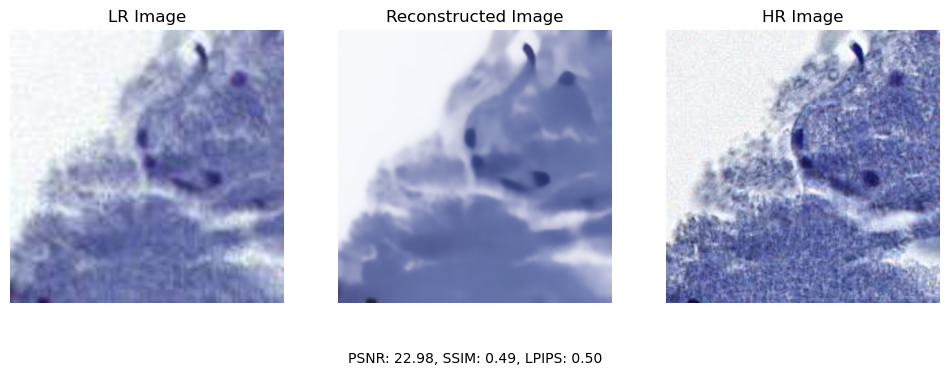

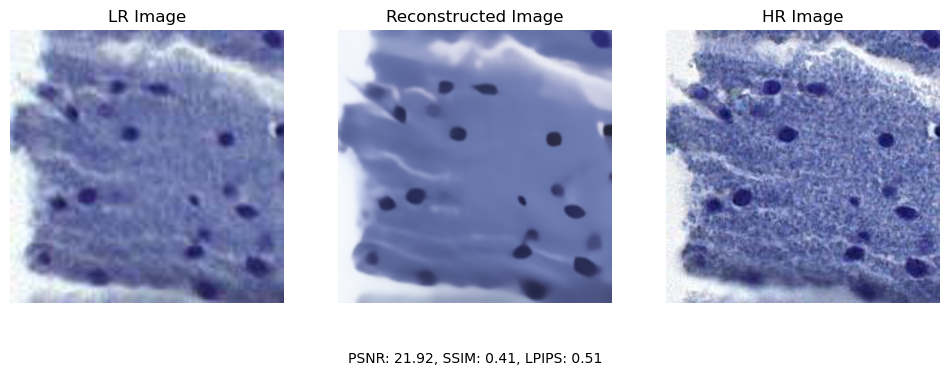

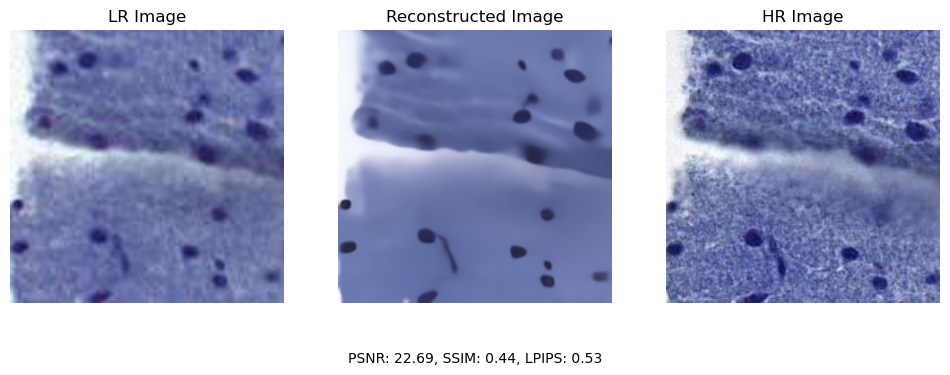

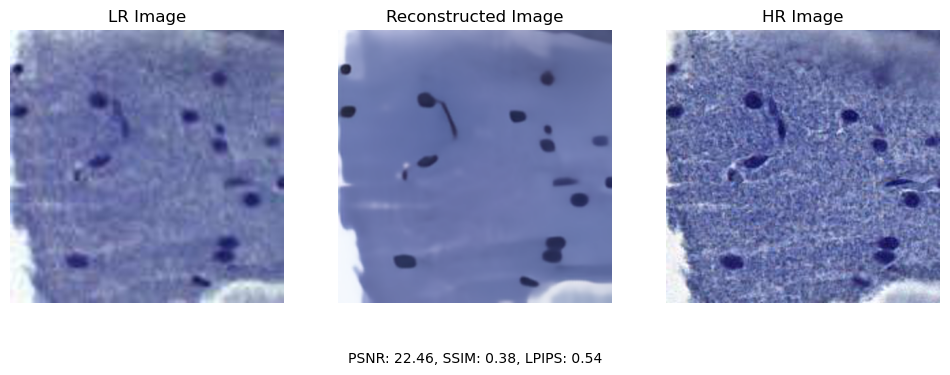

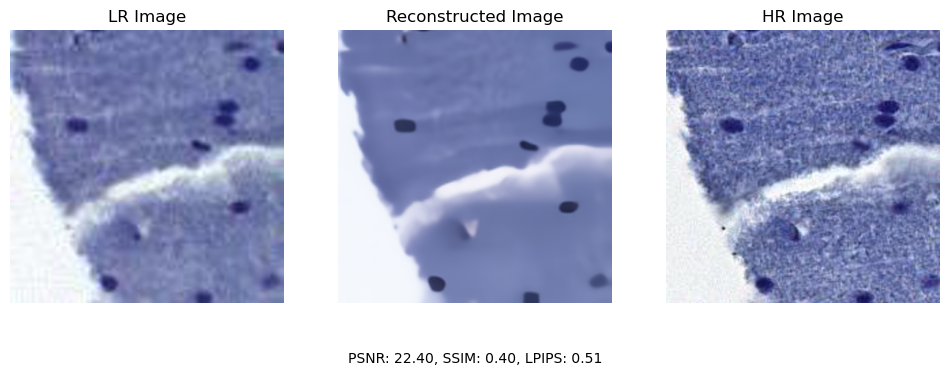

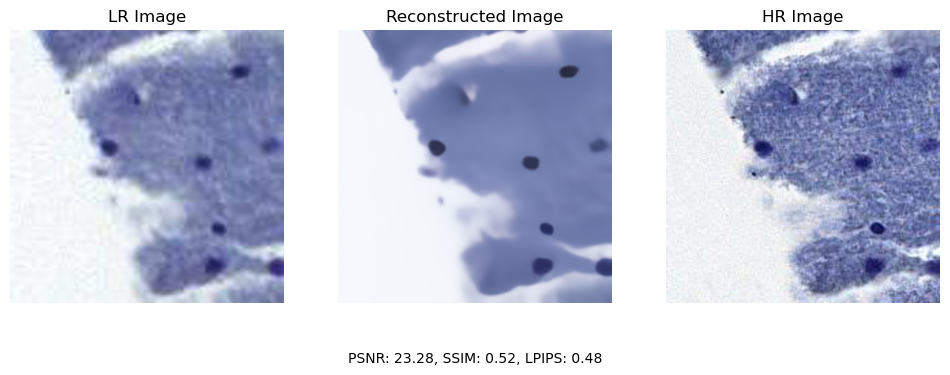

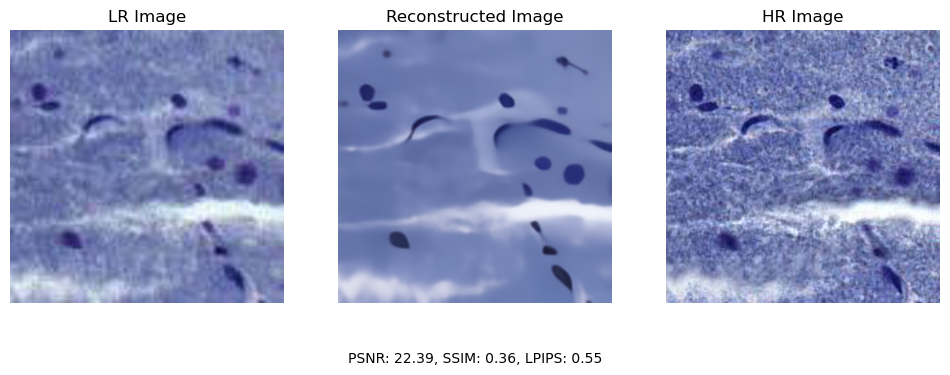

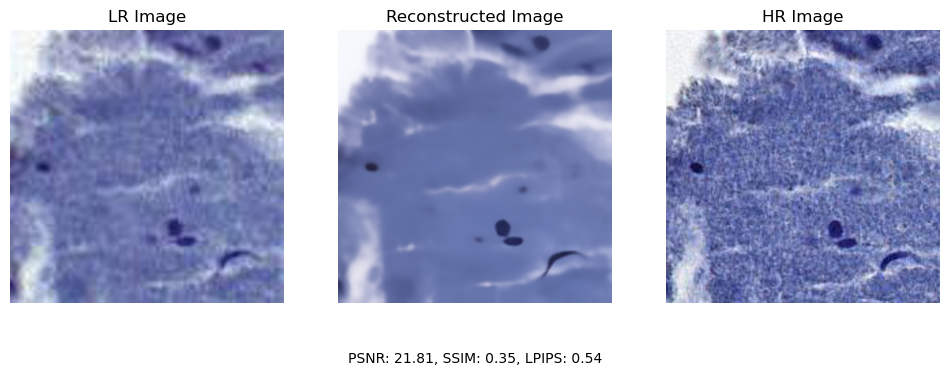

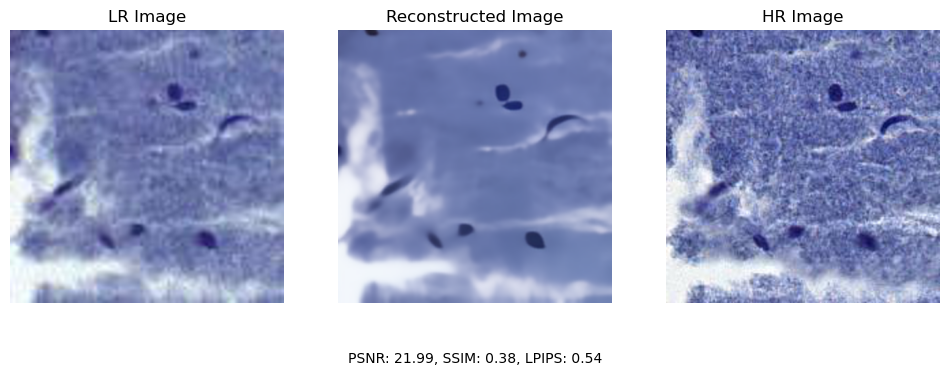

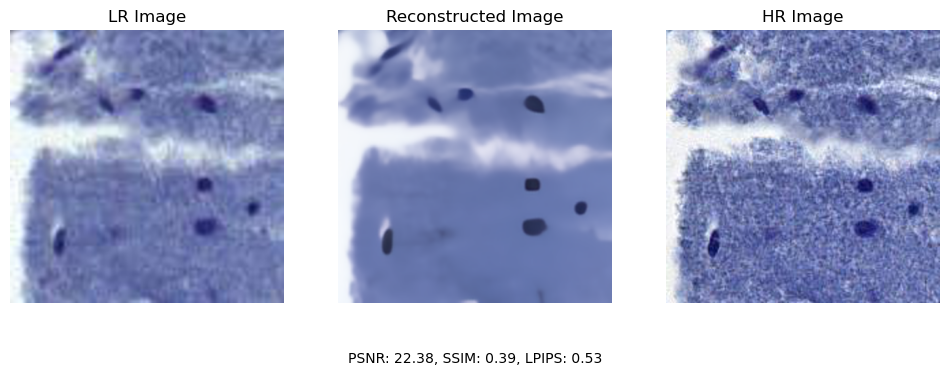

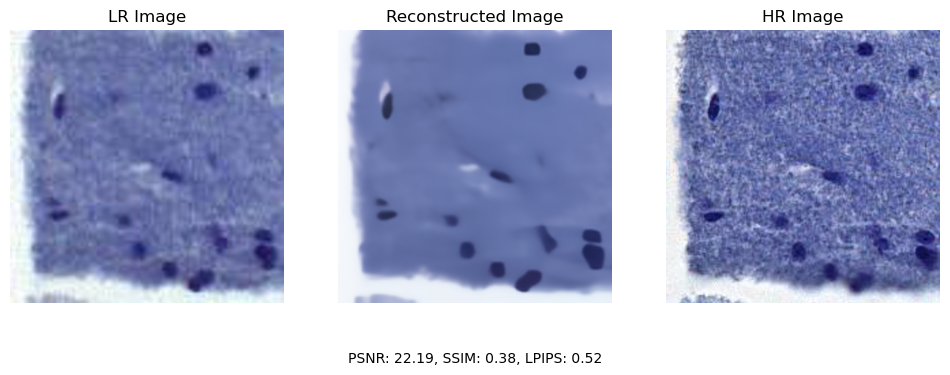

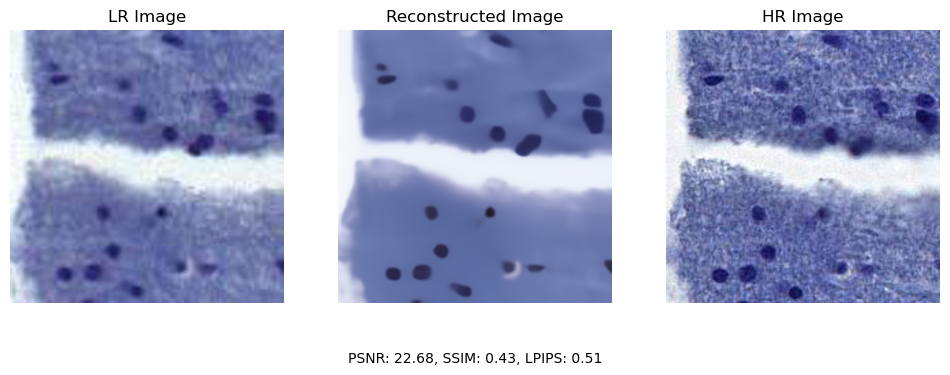

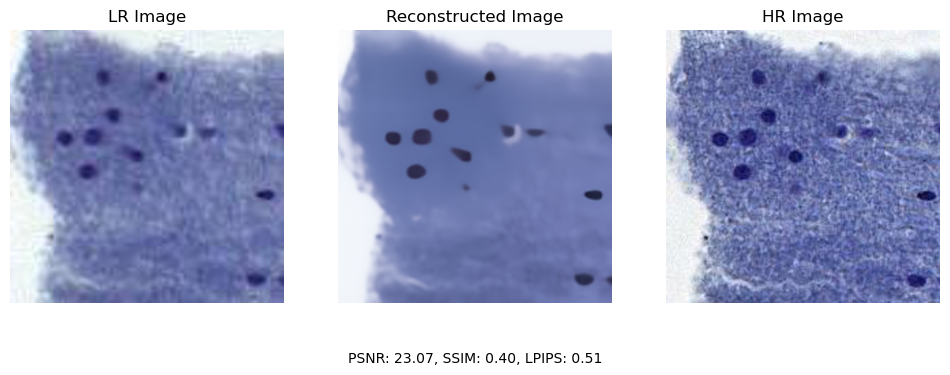

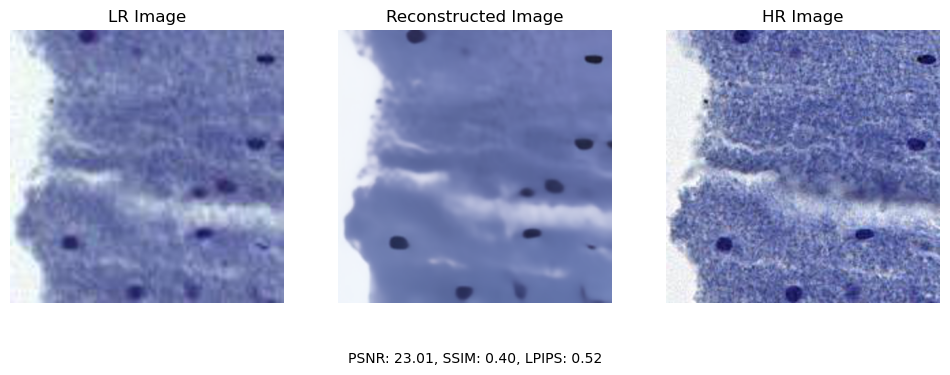

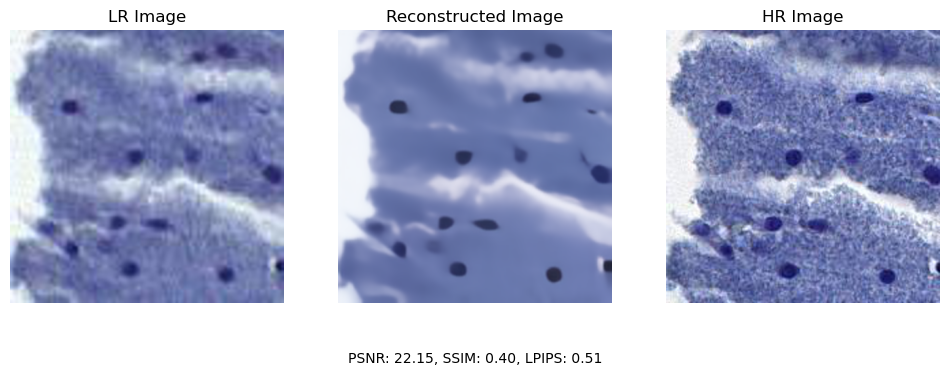

In [14]:
HR_images = 'C:/Users/lifea/Downloads/SISR/HR_images_for_evaluation'
comparision_folder = 'C:/Users/lifea/Downloads/SISR/model1_SWIN2SR/swin2sr/outputs_compared'

load_plot_save_images(inputs, results, HR_images, comparision_folder)